In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Get global data sql query
```sql
SELECT * FROM global_data
```

## Get Soeul data sql query
```sql
SELECT * FROM city_data
WHERE city = 'Seoul'
```

In [20]:
globalData = pd.read_csv("global_data.csv")
seoulData = pd.read_csv("seoul_data.csv")


In [21]:
print(seoulData.head(10))
print("\n")
print(globalData.head(10))


   year   city      country  avg_temp
0  1839  Seoul  South Korea      9.47
1  1840  Seoul  South Korea     10.21
2  1841  Seoul  South Korea      9.44
3  1842  Seoul  South Korea     10.13
4  1843  Seoul  South Korea     10.33
5  1844  Seoul  South Korea     10.15
6  1845  Seoul  South Korea     10.25
7  1846  Seoul  South Korea     10.57
8  1847  Seoul  South Korea     10.59
9  1848  Seoul  South Korea     10.36


   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47
5  1755      8.36
6  1756      8.85
7  1757      9.02
8  1758      6.74
9  1759      7.99


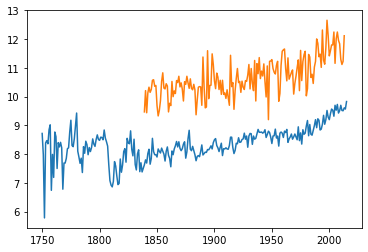

In [23]:
fig, ax = plt.subplots(1,1)

ax.plot(globalData.year, globalData.avg_temp)
ax.plot(seoulData.year, seoulData.avg_temp)

plt.show()